In [1]:
import numpy as np
import pandas as pd

#### EDA on the Sessions Data 

In [4]:
sessions_df = pd.read_excel('Task 1 SessionsC.xlsx', header=None)

In [5]:
sessions_df.head()

,0
0,"ymd,session_id,tracking_id,platform,is_app,is_..."
1,"20220626,2022062620046057322,FA6JXA8TAJ,UK,0,1..."
2,"20220518,2022051821943006017,0X7RLU6KF7,BR,0,0..."
3,"20220508,2022050821020053928,0I59VWLQW0,UK,0,0..."
4,"20220507,2022050706015039122,JXNHOBQL50,CH,0,0..."


In [13]:
old_df = sessions_df[0].str.split(',', expand=True)

In [14]:
old_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,ymd,session_id,tracking_id,platform,is_app,is_repeater,traffic_type,country_name,agent_id,clickouts,bookings,session_duration,entry_page,total_ctp,arrival_day,departure_day,None,None
1,20220626,2022062620046057322,FA6JXA8TAJ,UK,0,1,2,United Kingdom,16,0,0,29,2111,0,\N,\N,None,None
2,20220518,2022051821943006017,0X7RLU6KF7,BR,0,0,2,Brazil,2,3,0,1485,2100,27,20220530,20220531,None,None
3,20220508,2022050821020053928,0I59VWLQW0,UK,0,0,2,United Kingdom,20,0,0,143,2100,0,\N,\N,None,None
4,20220507,2022050706015039122,JXNHOBQL50,CH,0,0,2,Switzerland,28,0,0,69,2100,0,\N,\N,None,None


In [15]:
old_df.iloc[0, 16] = 'issue1'
old_df.iloc[0, 17] = 'issue2'

In [16]:
old_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,ymd,session_id,tracking_id,platform,is_app,is_repeater,traffic_type,country_name,agent_id,clickouts,bookings,session_duration,entry_page,total_ctp,arrival_day,departure_day,issue1,issue2
1,20220626,2022062620046057322,FA6JXA8TAJ,UK,0,1,2,United Kingdom,16,0,0,29,2111,0,\N,\N,None,None
2,20220518,2022051821943006017,0X7RLU6KF7,BR,0,0,2,Brazil,2,3,0,1485,2100,27,20220530,20220531,None,None
3,20220508,2022050821020053928,0I59VWLQW0,UK,0,0,2,United Kingdom,20,0,0,143,2100,0,\N,\N,None,None
4,20220507,2022050706015039122,JXNHOBQL50,CH,0,0,2,Switzerland,28,0,0,69,2100,0,\N,\N,None,None


In [17]:
old_df.columns = old_df.iloc[0]
old_df = old_df[1:]

In [18]:
old_df.head()

,ymd,session_id,tracking_id,platform,is_app,is_repeater,traffic_type,country_name,agent_id,clickouts,bookings,session_duration,entry_page,total_ctp,arrival_day,departure_day,issue1,issue2
1,20220626,2022062620046057322,FA6JXA8TAJ,UK,0,1,2,United Kingdom,16,0,0,29,2111,0,\N,\N,None,None
2,20220518,2022051821943006017,0X7RLU6KF7,BR,0,0,2,Brazil,2,3,0,1485,2100,27,20220530,20220531,None,None
3,20220508,2022050821020053928,0I59VWLQW0,UK,0,0,2,United Kingdom,20,0,0,143,2100,0,\N,\N,None,None
4,20220507,2022050706015039122,JXNHOBQL50,CH,0,0,2,Switzerland,28,0,0,69,2100,0,\N,\N,None,None
5,20220523,2022052320052048087,W24I0V5Z2L,IT,0,0,2,Italy,20,6,0,887,2100,100,20220609,20220610,None,None


In [72]:
old_df.shape

(900000, 18)

In [22]:
old_df['country_name'].unique()

array(['United Kingdom', 'Brazil', 'Switzerland', 'Italy', 'Russia',
       'Taiwan', 'France', 'Hungary', 'Argentina', 'Russian Federation',
       'Malaysia', 'Qatar', 'Sweden', 'United States', 'Canada',
       'Austria', 'South Africa', 'Chile', 'Malta', 'Spain', 'India',
       'Japan', 'Australia', 'Netherlands', 'Finland', 'Czech Republic',
       'United Arab Emirates', 'Germany', 'Indonesia', 'Colombia',
       'Turkey', 'Ireland', 'Slovakia', 'Peru', 'Poland', 'Portugal',
       'Philippines', 'New Zealand', 'Israel', 'Egypt', 'Hong Kong',
       'Korea', 'Vietnam', 'Mexico', 'Slovenia', 'El Salvador', 'Croatia',
       'Norway', 'Dominican Republic', 'Bulgaria', 'Puerto Rico',
       'Serbia', 'Republic of Korea', 'Greece', 'Thailand', 'Singapore',
       'Czechia', 'Saudi Arabia', 'Lebanon', '\\N', 'Morocco',
       'Ivory Coast', 'Denmark', 'Algeria', 'Cambodia', 'Jersey',
       'Belgium', 'Liechtenstein', 'Europe', 'Romania', 'Macedonia',
       'Macao', 'Ecuador', 'Moza

In [84]:
issue2_df = old_df[old_df['issue2'].notna()]
issue2_df

,ymd,session_id,tracking_id,platform,is_app,is_repeater,traffic_type,country_name,agent_id,clickouts,bookings,session_duration,entry_page,total_ctp,arrival_day,departure_day,issue1,issue2
15091,20220611,2022061112326005038,SNHGG11Z71,US,0,0,2,Bonaire,Sint Eustatius,and Saba,12,5,0,1784,2100,32,20220731,20220805
40138,20220617,2022061713359009031,27Q89Q7U74,US,0,0,2,Bonaire,Sint Eustatius,and Saba,2,0,0,0,2106,0,\N,\N
78180,20220624,2022062402010016774,48HRK3Z1Y6,UK,0,0,2,Bonaire,Sint Eustatius,and Saba,2,1,0,1632,2316,0,20220722,20220805
140477,20220628,2022062817330015967,HXU6SW8PC3,US,0,1,2,Bonaire,Sint Eustatius,and Saba,2,0,0,75,2106,0,\N,\N
284906,20220605,2022060515331016760,6V48IKRO1D,US,0,0,2,Bonaire,Sint Eustatius,and Saba,2,0,0,111,2100,0,\N,\N
303059,20220611,2022061122012025538,CFS5VWM0TH,NL,0,0,4,Bonaire,Sint Eustatius,and Saba,18,1,0,155,2111,35,20220620,20220621
699661,20220620,2022062015065046524,ZWA07767ZS,NL,0,0,6,Bonaire,Sint Eustatius,and Saba,2,0,0,5,2116,0,\N,\N


In [85]:
issue2_df['countries'] = issue2_df['country_name'] + "," + issue2_df['agent_id'] + "," + issue2_df['clickouts']
issue2_df.drop(['country_name', 'agent_id', 'clickouts'], axis=1, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_17000\2060615996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issue2_df['countries'] = issue2_df['country_name'] + "," + issue2_df['agent_id'] + "," + issue2_df['clickouts']
C:\Users\user\AppData\Local\Temp\ipykernel_17000\2060615996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issue2_df.drop(['country_name', 'agent_id', 'clickouts'], axis=1, inplace=True)


In [99]:
issue2_df = issue2_df.applymap(lambda x: '' if x == r'\N' else x)

In [100]:
issue2_df

,ymd,session_id,tracking_id,platform,is_app,is_repeater,traffic_type,bookings,session_duration,entry_page,total_ctp,arrival_day,departure_day,issue1,issue2,countries
15091,20220611,2022061112326005038,SNHGG11Z71,US,0,0,2,12,5,0,1784,2100,32,20220731,20220805,"Bonaire, Sint Eustatius, and Saba"
40138,20220617,2022061713359009031,27Q89Q7U74,US,0,0,2,2,0,0,0,2106,0,,,"Bonaire, Sint Eustatius, and Saba"
78180,20220624,2022062402010016774,48HRK3Z1Y6,UK,0,0,2,2,1,0,1632,2316,0,20220722,20220805,"Bonaire, Sint Eustatius, and Saba"
140477,20220628,2022062817330015967,HXU6SW8PC3,US,0,1,2,2,0,0,75,2106,0,,,"Bonaire, Sint Eustatius, and Saba"
284906,20220605,2022060515331016760,6V48IKRO1D,US,0,0,2,2,0,0,111,2100,0,,,"Bonaire, Sint Eustatius, and Saba"
303059,20220611,2022061122012025538,CFS5VWM0TH,NL,0,0,4,18,1,0,155,2111,35,20220620,20220621,"Bonaire, Sint Eustatius, and Saba"
699661,20220620,2022062015065046524,ZWA07767ZS,NL,0,0,6,2,0,0,5,2116,0,,,"Bonaire, Sint Eustatius, and Saba"


In [87]:
issue1_df = old_df[(old_df['issue1'].notna()) & (old_df['issue2'].isna())]
issue1_df

,ymd,session_id,tracking_id,platform,is_app,is_repeater,traffic_type,country_name,agent_id,clickouts,bookings,session_duration,entry_page,total_ctp,arrival_day,departure_day,issue1,issue2
165,20220511,2022051115680012266,0YR8ZHQA6Y,KR,0,0,2,Korea,Republic of,20,0,0,20,2100,0,\N,\N,None
478,20220511,2022051103670000370,WPN1JAD707,KR,0,0,2,Korea,Republic of,12,2,0,418,2100,2,20220525,20220527,None
876,20220507,2022050710617002522,P5LLP46QE5,KR,0,0,2,Korea,Republic of,12,0,0,101,2100,8,\N,\N,None
1225,20220511,2022051101648004589,1C1RNW3062,KR,0,0,2,Korea,Republic of,12,0,0,10,2100,0,\N,\N,None
1361,20220523,2022052302666002090,T84RSCEI46,KR,0,0,2,Korea,Republic of,20,2,0,109,2100,0,20220601,20220603,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899373,20220502,2022050211601003609,GBI3HJAAWX,KR,0,0,8,Korea,Republic of,20,0,0,47,2116,0,\N,\N,None
899533,20220522,2022052223693004263,GXKKRINBBO,KR,0,0,8,Korea,Republic of,2,0,0,0,2113,0,\N,\N,None
899538,20220509,2022050920657001190,SPYACVJC04,KR,0,1,8,Korea,Republic of,20,0,0,4,2116,0,\N,\N,None
899735,20220509,2022050900674010753,BG4FUKSFG3,KR,0,0,8,Korea,Republic of,12,0,0,0,2111,0,\N,\N,None


In [88]:
issue1_df['countries'] = issue1_df['country_name'] + "," + issue1_df['agent_id']
issue1_df.drop(['country_name', 'agent_id', 'issue2'], axis=1, inplace=True)
issue1_df

C:\Users\user\AppData\Local\Temp\ipykernel_17000\3472299651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issue1_df['countries'] = issue1_df['country_name'] + "," + issue1_df['agent_id']
C:\Users\user\AppData\Local\Temp\ipykernel_17000\3472299651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issue1_df.drop(['country_name', 'agent_id', 'issue2'], axis=1, inplace=True)


,ymd,session_id,tracking_id,platform,is_app,is_repeater,traffic_type,clickouts,bookings,session_duration,entry_page,total_ctp,arrival_day,departure_day,issue1,countries
165,20220511,2022051115680012266,0YR8ZHQA6Y,KR,0,0,2,20,0,0,20,2100,0,\N,\N,"Korea, Republic of"
478,20220511,2022051103670000370,WPN1JAD707,KR,0,0,2,12,2,0,418,2100,2,20220525,20220527,"Korea, Republic of"
876,20220507,2022050710617002522,P5LLP46QE5,KR,0,0,2,12,0,0,101,2100,8,\N,\N,"Korea, Republic of"
1225,20220511,2022051101648004589,1C1RNW3062,KR,0,0,2,12,0,0,10,2100,0,\N,\N,"Korea, Republic of"
1361,20220523,2022052302666002090,T84RSCEI46,KR,0,0,2,20,2,0,109,2100,0,20220601,20220603,"Korea, Republic of"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899373,20220502,2022050211601003609,GBI3HJAAWX,KR,0,0,8,20,0,0,47,2116,0,\N,\N,"Korea, Republic of"
899533,20220522,2022052223693004263,GXKKRINBBO,KR,0,0,8,2,0,0,0,2113,0,\N,\N,"Korea, Republic of"
899538,20220509,2022050920657001190,SPYACVJC04,KR,0,1,8,20,0,0,4,2116,0,\N,\N,"Korea, Republic of"
899735,20220509,2022050900674010753,BG4FUKSFG3,KR,0,0,8,12,0,0,0,2111,0,\N,\N,"Korea, Republic of"


In [89]:
issue1_df['countries'].unique()

array(['Korea, Republic of', 'Iran, Islamic Republic of',
       'Moldova, Republic of', 'Virgin Islands, U.S.',
       'Bonaire, Saint Eustatius and Saba',
       'Congo, The Democratic Republic of the',
       'Tanzania, United Republic of', 'Virgin Islands, British'],
      dtype=object)

In [101]:
issue1_df = issue1_df.applymap(lambda x: '' if x == r'\N' else x)
issue1_df

,ymd,session_id,tracking_id,platform,is_app,is_repeater,traffic_type,clickouts,bookings,session_duration,entry_page,total_ctp,arrival_day,departure_day,issue1,countries
165,20220511,2022051115680012266,0YR8ZHQA6Y,KR,0,0,2,20,0,0,20,2100,0,,,"Korea, Republic of"
478,20220511,2022051103670000370,WPN1JAD707,KR,0,0,2,12,2,0,418,2100,2,20220525,20220527,"Korea, Republic of"
876,20220507,2022050710617002522,P5LLP46QE5,KR,0,0,2,12,0,0,101,2100,8,,,"Korea, Republic of"
1225,20220511,2022051101648004589,1C1RNW3062,KR,0,0,2,12,0,0,10,2100,0,,,"Korea, Republic of"
1361,20220523,2022052302666002090,T84RSCEI46,KR,0,0,2,20,2,0,109,2100,0,20220601,20220603,"Korea, Republic of"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899373,20220502,2022050211601003609,GBI3HJAAWX,KR,0,0,8,20,0,0,47,2116,0,,,"Korea, Republic of"
899533,20220522,2022052223693004263,GXKKRINBBO,KR,0,0,8,2,0,0,0,2113,0,,,"Korea, Republic of"
899538,20220509,2022050920657001190,SPYACVJC04,KR,0,1,8,20,0,0,4,2116,0,,,"Korea, Republic of"
899735,20220509,2022050900674010753,BG4FUKSFG3,KR,0,0,8,12,0,0,0,2111,0,,,"Korea, Republic of"


In [90]:
noissues_df = old_df[(old_df['issue1'].isna()) & (old_df['issue2'].isna())]
noissues_df.drop(['issue1', 'issue2'], axis=1, inplace=True)
noissues_df

C:\Users\user\AppData\Local\Temp\ipykernel_17000\751520703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noissues_df.drop(['issue1', 'issue2'], axis=1, inplace=True)


,ymd,session_id,tracking_id,platform,is_app,is_repeater,traffic_type,country_name,agent_id,clickouts,bookings,session_duration,entry_page,total_ctp,arrival_day,departure_day
1,20220626,2022062620046057322,FA6JXA8TAJ,UK,0,1,2,United Kingdom,16,0,0,29,2111,0,\N,\N
2,20220518,2022051821943006017,0X7RLU6KF7,BR,0,0,2,Brazil,2,3,0,1485,2100,27,20220530,20220531
3,20220508,2022050821020053928,0I59VWLQW0,UK,0,0,2,United Kingdom,20,0,0,143,2100,0,\N,\N
4,20220507,2022050706015039122,JXNHOBQL50,CH,0,0,2,Switzerland,28,0,0,69,2100,0,\N,\N
5,20220523,2022052320052048087,W24I0V5Z2L,IT,0,0,2,Italy,20,6,0,887,2100,100,20220609,20220610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899996,20220630,2022063003683001079,X3H6E73Q2Z,ID,0,0,8,Indonesia,20,0,0,32,2113,0,\N,\N
899997,20220509,2022050921028019687,ODJ3C70BA9,DE,0,0,8,Germany,18,0,0,7,2116,0,\N,\N
899998,20220519,2022051904328017578,N0RPBRBKN3,US,0,1,8,United States,2,1,0,42,2116,0,20220606,20220609
899999,20220506,2022050601379019834,BF47FQ35KR,AU,0,0,8,Australia,18,0,0,3,2116,0,\N,\N


In [91]:

desired_columns_order = [col for col in noissues_df.columns if col != 'country_name'] + ['country_name']

# Reorder the DataFrame columns according to the desired order
noissues_df = noissues_df[desired_columns_order]
noissues_df

,ymd,session_id,tracking_id,platform,is_app,is_repeater,traffic_type,agent_id,clickouts,bookings,session_duration,entry_page,total_ctp,arrival_day,departure_day,country_name
1,20220626,2022062620046057322,FA6JXA8TAJ,UK,0,1,2,16,0,0,29,2111,0,\N,\N,United Kingdom
2,20220518,2022051821943006017,0X7RLU6KF7,BR,0,0,2,2,3,0,1485,2100,27,20220530,20220531,Brazil
3,20220508,2022050821020053928,0I59VWLQW0,UK,0,0,2,20,0,0,143,2100,0,\N,\N,United Kingdom
4,20220507,2022050706015039122,JXNHOBQL50,CH,0,0,2,28,0,0,69,2100,0,\N,\N,Switzerland
5,20220523,2022052320052048087,W24I0V5Z2L,IT,0,0,2,20,6,0,887,2100,100,20220609,20220610,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899996,20220630,2022063003683001079,X3H6E73Q2Z,ID,0,0,8,20,0,0,32,2113,0,\N,\N,Indonesia
899997,20220509,2022050921028019687,ODJ3C70BA9,DE,0,0,8,18,0,0,7,2116,0,\N,\N,Germany
899998,20220519,2022051904328017578,N0RPBRBKN3,US,0,1,8,2,1,0,42,2116,0,20220606,20220609,United States
899999,20220506,2022050601379019834,BF47FQ35KR,AU,0,0,8,18,0,0,3,2116,0,\N,\N,Australia


In [92]:
noissues_df['departure_day'].unique()


array(['\\N', '20220531', '20220610', '20220624', '20220606', '20220518',
       '20221021', '20220708', '20220701', '20220607', '20220809',
       '20220628', '20221120', '20220731', '20230609', '20220618',
       '20220520', '20220608', '20220524', '20220703', '20220704',
       '20220625', '20220711', '20220614', '20220715', '20221103',
       '20220818', '20220707', '20220826', '20220621', '20230202',
       '20221123', '20220603', '20220609', '20220521', '20220728',
       '20221002', '20220802', '20220813', '20220627', '20220724',
       '20220514', '20220526', '20220617', '20220903', '20220726',
       '20220714', '20230629', '20220602', '20220630', '20220619',
       '20221026', '20220716', '20220702', '20220721', '20220604',
       '20220718', '20220814', '20220831', '20220508', '20220909',
       '20221022', '20220807', '20220706', '20220717', '20220720',
       '20221206', '20220810', '20220615', '20220730', '20220722',
       '20220522', '20220829', '20220527', '20220529', 

In [102]:
noissues_df = noissues_df.applymap(lambda x: '' if x == r'\N' else x)
noissues_df

,ymd,session_id,tracking_id,platform,is_app,is_repeater,traffic_type,agent_id,clickouts,bookings,session_duration,entry_page,total_ctp,arrival_day,departure_day,country_name
1,20220626,2022062620046057322,FA6JXA8TAJ,UK,0,1,2,16,0,0,29,2111,0,,,United Kingdom
2,20220518,2022051821943006017,0X7RLU6KF7,BR,0,0,2,2,3,0,1485,2100,27,20220530,20220531,Brazil
3,20220508,2022050821020053928,0I59VWLQW0,UK,0,0,2,20,0,0,143,2100,0,,,United Kingdom
4,20220507,2022050706015039122,JXNHOBQL50,CH,0,0,2,28,0,0,69,2100,0,,,Switzerland
5,20220523,2022052320052048087,W24I0V5Z2L,IT,0,0,2,20,6,0,887,2100,100,20220609,20220610,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899996,20220630,2022063003683001079,X3H6E73Q2Z,ID,0,0,8,20,0,0,32,2113,0,,,Indonesia
899997,20220509,2022050921028019687,ODJ3C70BA9,DE,0,0,8,18,0,0,7,2116,0,,,Germany
899998,20220519,2022051904328017578,N0RPBRBKN3,US,0,1,8,2,1,0,42,2116,0,20220606,20220609,United States
899999,20220506,2022050601379019834,BF47FQ35KR,AU,0,0,8,18,0,0,3,2116,0,,,Australia


In [103]:
noissues_df.shape, issue1_df.shape, issue2_df.shape

((896490, 16), (3503, 16), (7, 16))

In [107]:
noissues_df.to_csv('sessions1.csv', index=False)

In [105]:
issue1_df.to_csv('sessions2.csv', index=False)

In [106]:
issue2_df.to_csv('sessions3.csv', index=False)

#### Actions EDA

In [108]:
actions_df = pd.read_excel('Task 2 Actions.xlsx', header=None)

In [109]:
actions_df.head()

,0
0,"session_id,tracking_id,date_id,action_id,actio..."
1,"2022051219047047198,W3ZTG14L5L,202205121905103..."
2,"2022053117093000001,001J2RM6SK,202205311709300..."
3,"2022051219047047198,W3ZTG14L5L,202205121905103..."
4,"2022053117093000001,001J2RM6SK,202205311709300..."


In [110]:
actions_df = actions_df[0].str.split(',', expand=True)

In [111]:
actions_df.head()

,0,1,2,3,4,5
0,session_id,tracking_id,date_id,action_id,action_reference,step
1,2022051219047047198,W3ZTG14L5L,2022051219051031064,2113,38715,27
2,2022053117093000001,001J2RM6SK,2022053117093000001,2100,0,1
3,2022051219047047198,W3ZTG14L5L,2022051219051031871,2160,62,28
4,2022053117093000001,001J2RM6SK,2022053117093002301,2100,0,3


In [112]:
actions_df.columns = actions_df.iloc[0]
actions_df = actions_df[1:]

In [113]:
actions_df

,session_id,tracking_id,date_id,action_id,action_reference,step
1,2022051219047047198,W3ZTG14L5L,2022051219051031064,2113,38715,27
2,2022053117093000001,001J2RM6SK,2022053117093000001,2100,0,1
3,2022051219047047198,W3ZTG14L5L,2022051219051031871,2160,62,28
4,2022053117093000001,001J2RM6SK,2022053117093002301,2100,0,3
5,2022051219047047198,W3ZTG14L5L,2022051219051051853,2113,38715,29
...,...,...,...,...,...,...
1048571,2022062508366011311,S1CUNC4JX8,2022062508367002108,2350,0,11
1048572,2022062508366011311,S1CUNC4JX8,2022062508367002113,2351,6,12
1048573,2022062508366011311,S1CUNC4JX8,2022062508367002112,2351,0,13
1048574,2022062508366011311,S1CUNC4JX8,2022062508367002680,2113,51357,15


In [114]:
actions_df = actions_df.applymap(lambda x: '' if x == r'\N' else x)
actions_df

,session_id,tracking_id,date_id,action_id,action_reference,step
1,2022051219047047198,W3ZTG14L5L,2022051219051031064,2113,38715,27
2,2022053117093000001,001J2RM6SK,2022053117093000001,2100,0,1
3,2022051219047047198,W3ZTG14L5L,2022051219051031871,2160,62,28
4,2022053117093000001,001J2RM6SK,2022053117093002301,2100,0,3
5,2022051219047047198,W3ZTG14L5L,2022051219051051853,2113,38715,29
...,...,...,...,...,...,...
1048571,2022062508366011311,S1CUNC4JX8,2022062508367002108,2350,0,11
1048572,2022062508366011311,S1CUNC4JX8,2022062508367002113,2351,6,12
1048573,2022062508366011311,S1CUNC4JX8,2022062508367002112,2351,0,13
1048574,2022062508366011311,S1CUNC4JX8,2022062508367002680,2113,51357,15


In [115]:
actions_df.to_csv('actions_task2.csv', index=False)

In [116]:
sess_df = pd.read_csv('sessions_task1.csv')

In [117]:
sess_df

,ymd,session_id,tracking_id,platform,is_app,is_repeater,traffic_type,agent_id,clickouts,bookings,session_duration,entry_page,total_ctp,arrival_day,departure_day,country_name
0,20220626,2022062620046057322,FA6JXA8TAJ,UK,0,1,2,16,0,0,29,2111,0,NaN,NaN,United Kingdom
1,20220518,2022051821943006017,0X7RLU6KF7,BR,0,0,2,2,3,0,1485,2100,27,20220530.0,20220531.0,Brazil
2,20220508,2022050821020053928,0I59VWLQW0,UK,0,0,2,20,0,0,143,2100,0,NaN,NaN,United Kingdom
3,20220507,2022050706015039122,JXNHOBQL50,CH,0,0,2,28,0,0,69,2100,0,NaN,NaN,Switzerland
4,20220523,2022052320052048087,W24I0V5Z2L,IT,0,0,2,20,6,0,887,2100,100,20220609.0,20220610.0,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,20220624,2022062402010016774,48HRK3Z1Y6,UK,0,0,2,2,1,0,1632,2316,0,20220722.0,20220805.0,"Bonaire, Sint Eustatius, and Saba"
899996,20220628,2022062817330015967,HXU6SW8PC3,US,0,1,2,2,0,0,75,2106,0,NaN,NaN,"Bonaire, Sint Eustatius, and Saba"
899997,20220605,2022060515331016760,6V48IKRO1D,US,0,0,2,2,0,0,111,2100,0,NaN,NaN,"Bonaire, Sint Eustatius, and Saba"
899998,20220611,2022061122012025538,CFS5VWM0TH,NL,0,0,4,18,1,0,155,2111,35,20220620.0,20220621.0,"Bonaire, Sint Eustatius, and Saba"


In [124]:
sess_df[['clickouts', 'bookings', 'session_duration', 'total_ctp']].describe()

,clickouts,bookings,session_duration,total_ctp
count,900000.000000,900000.000000,900000.000000,900000.000000
mean,0.843981,0.009877,392.361784,6.486588
std,1.813060,0.107203,989.495531,30.995589
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,0.000000,65.000000,0.000000
75%,1.000000,0.000000,287.000000,1.000000
max,86.000000,8.000000,83335.000000,3662.000000


In [125]:
sess_df[sess_df['clickouts'] >= 40]

,ymd,session_id,tracking_id,platform,is_app,is_repeater,traffic_type,agent_id,clickouts,bookings,session_duration,entry_page,total_ctp,arrival_day,departure_day,country_name
3861,20220614,2022061419058061697,09J398UBB8,SE,0,1,2,14,40,0,5675,2100,179,20221022.0,20221029.0,Sweden
5712,20220509,2022050901313002290,UQG2E0AG80,AU,0,1,2,2,72,0,2682,2100,0,20220707.0,20220708.0,Australia
14187,20220514,2022051412680014663,MJ3S7B73Z7,HK,0,1,2,18,42,0,4976,2100,0,20220531.0,20220602.0,Hong Kong
25788,20220620,2022062000940004354,CBYVGWA69D,CA,0,1,2,2,49,0,10436,2100,261,20220706.0,20220708.0,Canada
33147,20220611,2022061109039052359,VRTC837OMC,UK,0,0,2,2,48,0,8421,2226,435,20220829.0,20220830.0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695519,20220607,2022060710087025677,4EQLKDH5IG,ES,0,1,6,2,47,0,15143,2116,0,20220921.0,20220925.0,Spain
695772,20220502,2022050220031068232,TZACVO69RH,IT,0,0,6,20,47,0,3622,2115,12,20220811.0,20220818.0,Italy
703732,20220521,2022052117011037161,JYV8X536M6,RU,0,1,8,4,58,0,7743,2113,0,20220820.0,20220830.0,Russian Federation
769477,20220628,2022062811070044115,JWA6CY7FW4,RU,0,1,8,4,41,0,5650,2116,0,20220825.0,20220901.0,Russia


In [126]:
import matplotlib.pyplot as plt

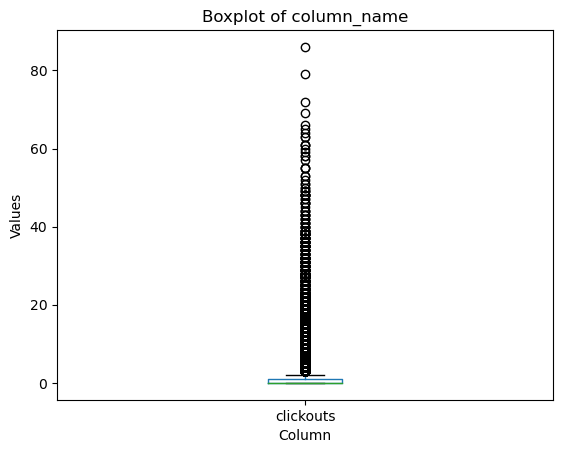

In [127]:
sess_df.boxplot(column='clickouts')

# Customizing the plot (optional)
plt.title('Boxplot of column_name')
plt.ylabel('Values')
plt.xlabel('Column')
plt.grid(False)
plt.show()

In [128]:
import seaborn as sns

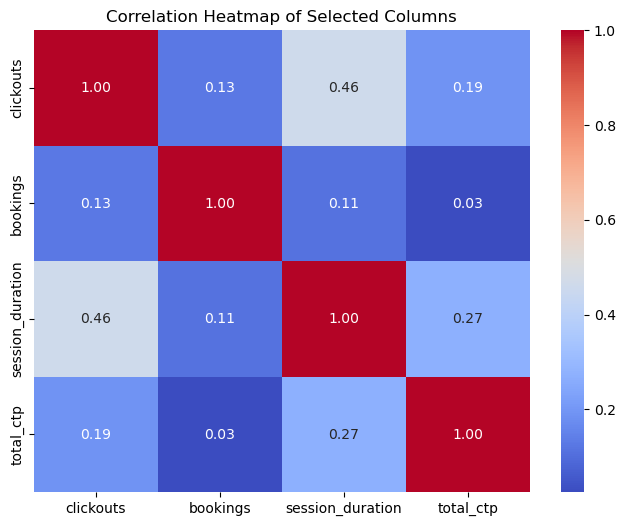

In [129]:
selected_columns = ['clickouts', 'bookings', 'session_duration', 'total_ctp']
selected_df = sess_df[selected_columns]

# Calculate correlation matrix
correlation_matrix = selected_df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Set title
plt.title('Correlation Heatmap of Selected Columns')

# Show plot
plt.show()

In [130]:
sess_df

,ymd,session_id,tracking_id,platform,is_app,is_repeater,traffic_type,agent_id,clickouts,bookings,session_duration,entry_page,total_ctp,arrival_day,departure_day,country_name
0,20220626,2022062620046057322,FA6JXA8TAJ,UK,0,1,2,16,0,0,29,2111,0,NaN,NaN,United Kingdom
1,20220518,2022051821943006017,0X7RLU6KF7,BR,0,0,2,2,3,0,1485,2100,27,20220530.0,20220531.0,Brazil
2,20220508,2022050821020053928,0I59VWLQW0,UK,0,0,2,20,0,0,143,2100,0,NaN,NaN,United Kingdom
3,20220507,2022050706015039122,JXNHOBQL50,CH,0,0,2,28,0,0,69,2100,0,NaN,NaN,Switzerland
4,20220523,2022052320052048087,W24I0V5Z2L,IT,0,0,2,20,6,0,887,2100,100,20220609.0,20220610.0,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,20220624,2022062402010016774,48HRK3Z1Y6,UK,0,0,2,2,1,0,1632,2316,0,20220722.0,20220805.0,"Bonaire, Sint Eustatius, and Saba"
899996,20220628,2022062817330015967,HXU6SW8PC3,US,0,1,2,2,0,0,75,2106,0,NaN,NaN,"Bonaire, Sint Eustatius, and Saba"
899997,20220605,2022060515331016760,6V48IKRO1D,US,0,0,2,2,0,0,111,2100,0,NaN,NaN,"Bonaire, Sint Eustatius, and Saba"
899998,20220611,2022061122012025538,CFS5VWM0TH,NL,0,0,4,18,1,0,155,2111,35,20220620.0,20220621.0,"Bonaire, Sint Eustatius, and Saba"
